Do some Clustering of phenotypic data
- get pheno stuff as a matrix
- take the distance/1-correlation matrix of that
- cluster with scipy cluster
- happiness

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy import cluster as scl
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs

In [2]:
# Load pheno file
#path_root = '/media/yassinebha/database29/Drive/HCP/'
path_root = '/home/yassinebha/Drive/HCP/'
pheno = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno_clean.csv'))
use_columns = pheno.columns.get_values() # here all
# Number of subtypes
n_sbt = 7
# Find guys who are missing any of these columns
missing = np.array([pheno[col].isnull().values for col in use_columns]).any(0)
# Don't use these guys
use_pheno = pheno[~missing]

In [3]:
# Show list of columns
list(pheno.columns)

['Age_in_Yrs',
 'Gender',
 'Handedness',
 'Zygosity',
 'Race',
 'Ethnicity',
 'SSAGA_Income',
 'SSAGA_Educ',
 'BMI',
 'BPSystolic',
 'BPDiastolic',
 'PSQI_Score',
 'PicSeq_Unadj',
 'CardSort_Unadj',
 'Flanker_Unadj',
 'PMAT24_A_CR',
 'PMAT24_A_RTCR',
 'ReadEng_Unadj',
 'PicVocab_Unadj',
 'ProcSpeed_Unadj',
 'DDisc_AUC_200',
 'DDisc_AUC_40K',
 'VSPLOT_TC',
 'VSPLOT_CRTE',
 'SCPT_TPRT',
 'SCPT_SEN',
 'SCPT_SPEC',
 'IWRD_TOT',
 'IWRD_RTC',
 'ER40_CR',
 'ER40_CRT',
 'Sadness_Unadj',
 'FearSomat_Unadj',
 'FearAffect_Unadj',
 'AngAggr_Unadj',
 'AngHostil_Unadj',
 'AngAffect_Unadj',
 'LifeSatisf_Unadj',
 'MeanPurp_Unadj',
 'PosAffect_Unadj',
 'Friendship_Unadj',
 'Loneliness_Unadj',
 'PercHostil_Unadj',
 'PercReject_Unadj',
 'EmotSupp_Unadj',
 'InstruSupp_Unadj',
 'PercStress_Unadj',
 'SelfEff_Unadj',
 'Noise_Comp',
 'Odor_Unadj',
 'PainInterf_Tscore',
 'Taste_Unadj',
 'Mars_Final',
 'Endurance_AgeAdj',
 'GaitSpeed_Comp',
 'Dexterity_Unadj',
 'Strength_AgeAdj',
 'NEOFAC_A',
 'NEOFAC_O',
 'NEO

In [4]:
# Make matrix out of the remaining guys
pheno_mat = use_pheno.as_matrix()
# Normalize these guys by column
pheno_norm = (pheno_mat - np.mean(pheno_mat, 0))/np.std(pheno_mat, 0)
# Get the correlation of these
pheno_corr = np.corrcoef(pheno_norm.T)
# And get the distance matrix of that
pheno_dist = scl.hierarchy.distance.pdist(pheno_norm.T)
pheno_dist_mat = scl.hierarchy.distance.squareform(pheno_dist)

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [6]:
cmap = mpl.cm.jet
cmap_r = reverse_colourmap(cmap)

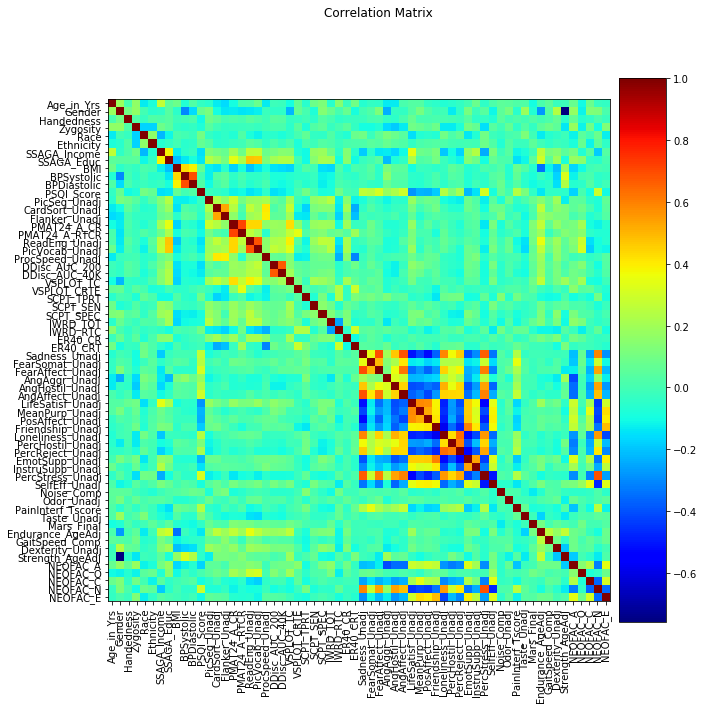

In [28]:
# Show that correlation
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_corr,cmap = mpl.cm.jet)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(use_columns)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(use_columns, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Correlation Matrix')

In [ ]:
mpl.cm.jet_r

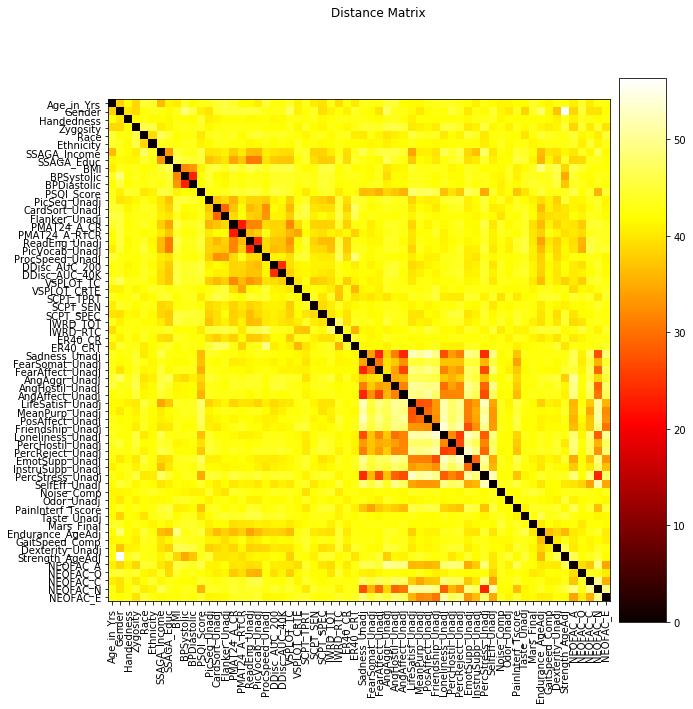

In [30]:
# Show that distance
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_dist_mat,cmap = mpl.cm.hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(use_columns)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(use_columns, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Distance Matrix')

In [11]:
# Now do some clustering on that
link = scl.hierarchy.linkage(pheno_dist, method='ward')
part = scl.hierarchy.fcluster(link, n_sbt, criterion='maxclust')
order = scl.hierarchy.dendrogram(link, no_plot=True)['leaves']

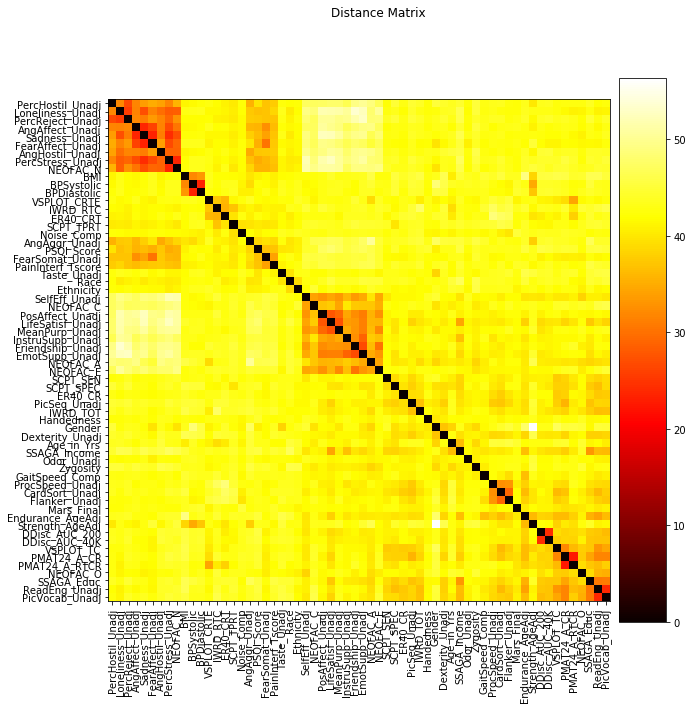

In [31]:
# Plot the distance matrix again, but now ordered by hierarchy
label_ord = [use_columns[ord] for ord in order]
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(pheno_dist_mat[order, :][:, order],cmap =mpl.cm.hot)
tmp = ax.set_yticks(range(len(use_columns)))
tmp = ax.set_yticklabels(label_ord)
tmp = ax.set_xticks(range(len(use_columns)))
tmp = ax.set_xticklabels(label_ord, rotation=90)
tmp = f.colorbar(p, cax=axcl)
tmp = f.suptitle('Distance Matrix')

In [14]:
# Here are the groups I found:
for sid in np.unique(part):
    match_cols = [use_columns[x] for x in np.where(part==sid)[0]]
    print('Subtype {} has the following variables:'.format(sid))
    for col in match_cols:
        print('    {}'.format(col))

Subtype 1 has the following variables:
    Sadness_Unadj
    FearAffect_Unadj
    AngHostil_Unadj
    AngAffect_Unadj
    Loneliness_Unadj
    PercHostil_Unadj
    PercReject_Unadj
    PercStress_Unadj
    NEOFAC_N
Subtype 2 has the following variables:
    BMI
    BPSystolic
    BPDiastolic
Subtype 3 has the following variables:
    Race
    Ethnicity
    PSQI_Score
    VSPLOT_CRTE
    SCPT_TPRT
    IWRD_RTC
    ER40_CRT
    FearSomat_Unadj
    AngAggr_Unadj
    Noise_Comp
    PainInterf_Tscore
    Taste_Unadj
Subtype 4 has the following variables:
    LifeSatisf_Unadj
    MeanPurp_Unadj
    PosAffect_Unadj
    Friendship_Unadj
    EmotSupp_Unadj
    InstruSupp_Unadj
    SelfEff_Unadj
    NEOFAC_A
    NEOFAC_C
    NEOFAC_E
Subtype 5 has the following variables:
    Age_in_Yrs
    Gender
    Handedness
    Zygosity
    SSAGA_Income
    PicSeq_Unadj
    SCPT_SEN
    SCPT_SPEC
    IWRD_TOT
    ER40_CR
    Odor_Unadj
    GaitSpeed_Comp
    Dexterity_Unadj
Subtype 6 has the following varia

In [15]:
# Make a new pheno table with the average scores of these subtypes
data = np.array([np.mean(use_pheno[[use_columns[x] for x in np.where(part==sid)[0]]],1) for sid in np.unique(part)])
ind = use_pheno.index
col_names = ['Subtype_{}'.format(x) for x in np.unique(part)]
sbt_pheno = pd.DataFrame(data=data.T, columns=col_names, index=ind)
# Merge this with the original dataframe so I can get all that other stuff I didn't use
merged_pheno = pd.merge(pheno, sbt_pheno, how='right', left_index=True, right_index=True)

In [16]:
# Look at it (new stuff on the right)
merged_pheno.head()

,Age_in_Yrs,Gender,Handedness,Zygosity,Race,Ethnicity,SSAGA_Income,SSAGA_Educ,BMI,BPSystolic,...,NEOFAC_C,NEOFAC_N,NEOFAC_E,Subtype_1,Subtype_2,Subtype_3,Subtype_4,Subtype_5,Subtype_6,Subtype_7
0,24,1,95,0.0,0,0,4.0,14.0,25.49,135.0,...,28.0,24.0,25.0,55.466667,79.163333,383.750067,32.87,39.703462,93.066667,1763.139996
2,27,2,95,1.0,0,0,7.0,16.0,22.96,117.0,...,35.0,15.0,37.0,49.822222,69.986667,363.899167,43.84,41.533200,92.735000,1347.082626
3,33,1,55,2.0,0,0,7.0,16.0,27.75,152.0,...,34.0,15.0,33.0,46.044444,91.250000,387.020475,47.05,40.482569,97.853333,375.297157
4,27,1,85,1.0,0,0,6.0,16.0,36.91,141.0,...,36.0,7.0,15.0,42.366667,84.303333,344.352933,44.53,42.531923,98.508333,1405.978009
5,35,2,90,2.0,1,0,3.0,12.0,30.27,130.0,...,39.0,13.0,29.0,45.633333,82.423333,465.084033,43.23,39.666023,79.905000,760.558638


In [18]:
# Save the new thing so I can look at it later
merged_pheno.to_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/clustered_hcp_all_pheno_clean.csv'), index=False)

Shapiro-test


,DF,Test Statistic,p-value
Subtype_1,901,0.991972,8.221528e-05
Subtype_2,901,0.983806,1.914708e-08
Subtype_3,901,0.952624,1.885820e-16
Subtype_4,901,0.996006,2.034302e-02
Subtype_5,901,0.871073,1.277348e-26
Subtype_6,901,0.996304,3.178384e-02
Subtype_7,901,0.936076,3.213488e-19


/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


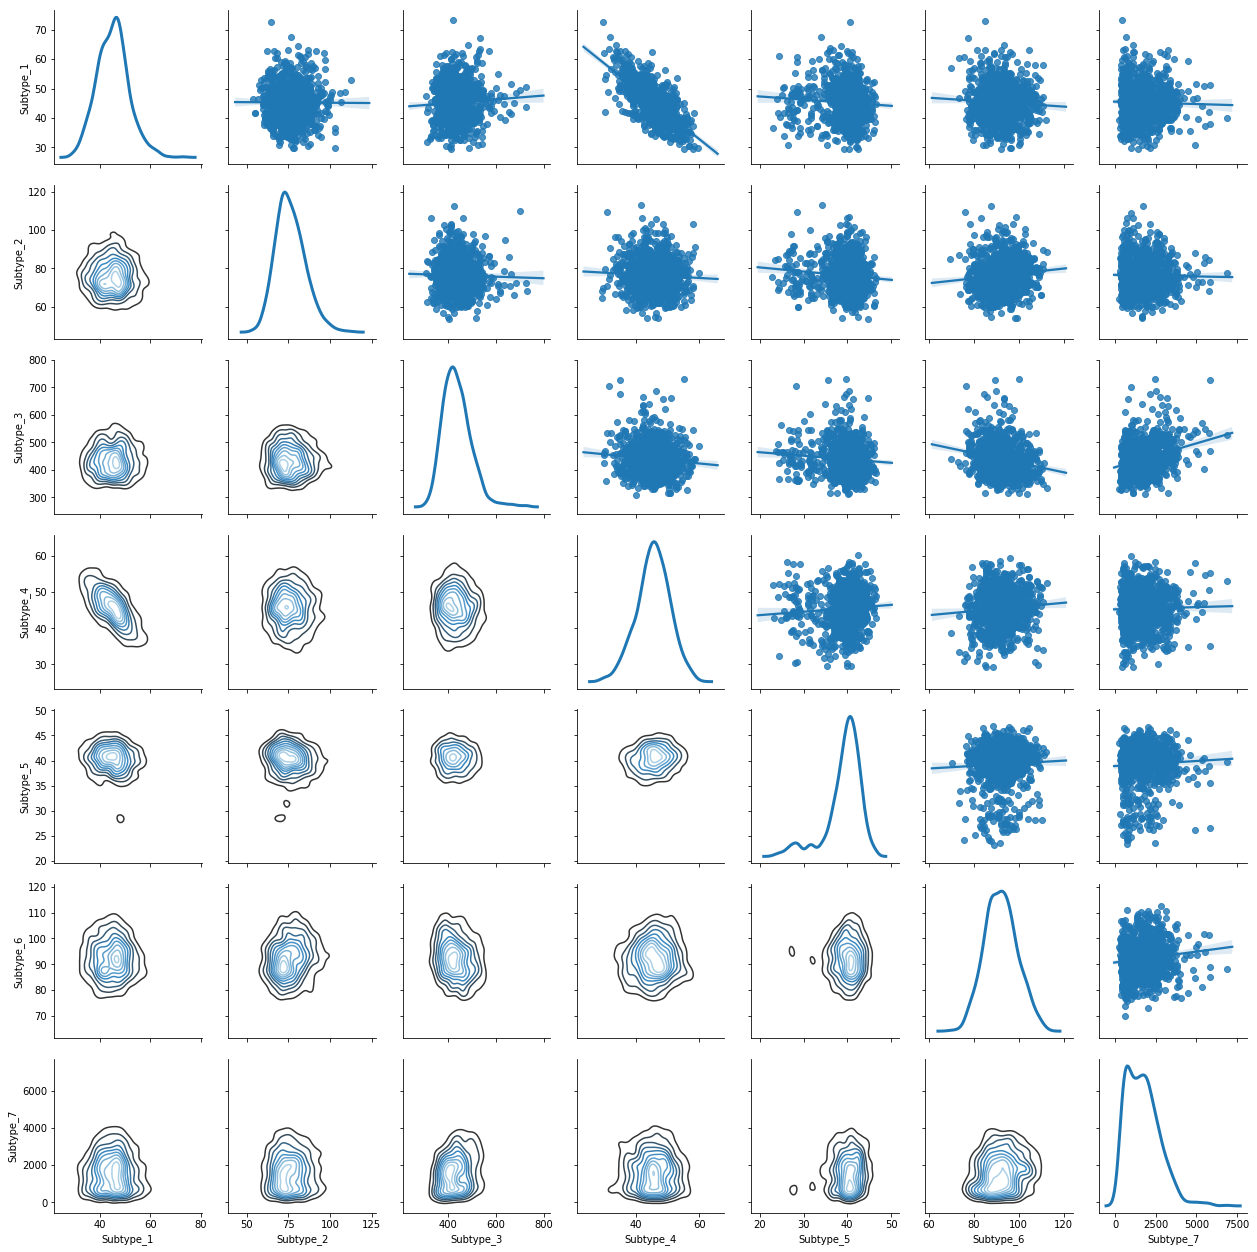

In [23]:
import scipy
from scipy import stats, integrate
import pandas as pd
import seaborn.apionly as sns
from IPython.display import display
# Test for normality distribution of clusters
x = merged_pheno.Subtype_1.dropna()
y = merged_pheno.Subtype_2.dropna()
z = merged_pheno.Subtype_3.dropna()
u = merged_pheno.Subtype_4.dropna()
v = merged_pheno.Subtype_5.dropna()
w = merged_pheno.Subtype_6.dropna()
s = merged_pheno.Subtype_7.dropna()


shapiro_results_x = scipy.stats.shapiro(x)
shapiro_results_y = scipy.stats.shapiro(y)
shapiro_results_z = scipy.stats.shapiro(z)
shapiro_results_u = scipy.stats.shapiro(u)
shapiro_results_v = scipy.stats.shapiro(v)
shapiro_results_w = scipy.stats.shapiro(w)
shapiro_results_s = scipy.stats.shapiro(s)



dict_sw = {'DF':[len(x) - 1,len(y) - 1,len(z) - 1,len(u) - 1,
                 len(v) - 1,len(w) - 1,len(s) - 1],
           'Test Statistic': [shapiro_results_x[0],shapiro_results_y[0],
                              shapiro_results_z[0],shapiro_results_u[0],
                              shapiro_results_v[0],shapiro_results_w[0],
                              shapiro_results_s[0]],
           'p-value': [shapiro_results_x[1],shapiro_results_y[1],
                       shapiro_results_z[1],shapiro_results_u[1],
                       shapiro_results_v[1],shapiro_results_w[1],
                       shapiro_results_s[1]]}
df = pd.DataFrame(dict_sw,index=["Subtype_1","Subtype_2","Subtype_3","Subtype_4",
                                 "Subtype_5","Subtype_6","Subtype_7"])
print('Shapiro-test')
display(df)

# PLot distribution
g = sns.PairGrid(merged_pheno.get(["Subtype_1","Subtype_2","Subtype_3","Subtype_4","Subtype_5","Subtype_6","Subtype_7"]).dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot,x_jitter=.4,y_jitter=.4)
g.map_diag(sns.kdeplot, lw=3)